<a href="https://colab.research.google.com/github/wayhome/colab/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 为 matplotlib 添加中文支持
!apt -qy install fonts-noto-cjk
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_cjk = fm.FontProperties(fname=r'/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc')
plt.rcParams['font.family'] = font_cjk.get_name()
fm.fontManager.addfont(font_cjk.get_file())
matplotlib.rc('font', family=font_cjk.get_name())

Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 1s (57.5 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


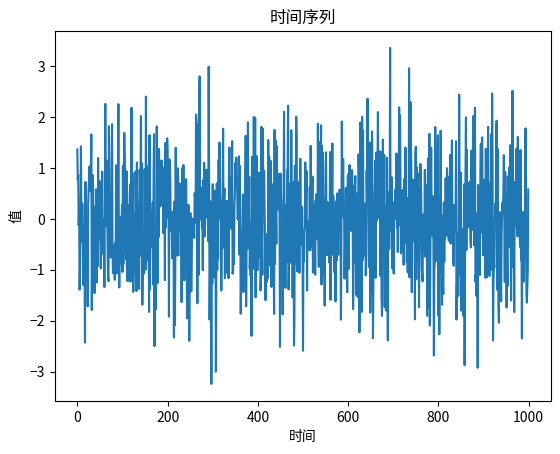

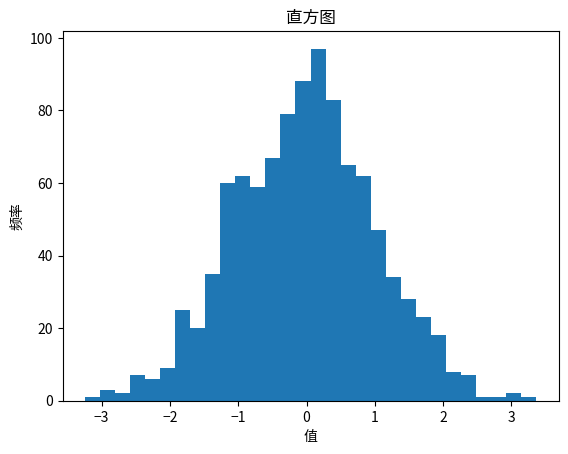

In [2]:
import numpy as np


# 生成1000个来自标准正态分布的样本
samples = np.random.randn(1000)

# 可视化为时间序列
plt.plot(samples)
plt.title('时间序列')
plt.xlabel('时间')
plt.ylabel('值')
plt.show()

# 可视化为直方图
plt.hist(samples, bins=30)
plt.title('直方图')
plt.xlabel('值')
plt.ylabel('频率')
plt.show()


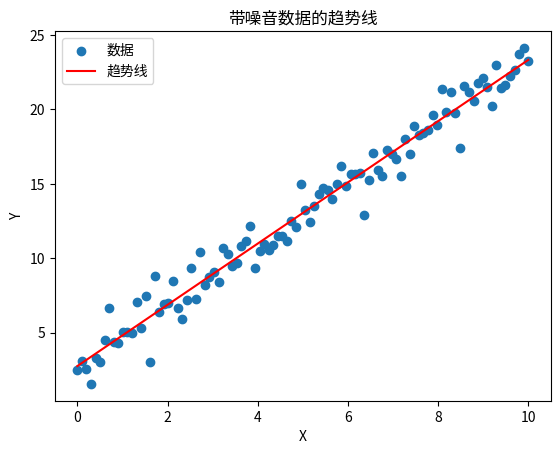

In [3]:
# 生成带噪音的数据
x = np.linspace(0, 10, 100)
y = 2*x + 3 + np.random.randn(100)

# 拟合趋势线
coefficients = np.polyfit(x, y, 1)
trendline = np.polyval(coefficients, x)

# 绘制散点图和趋势线
plt.scatter(x, y, label='数据')
plt.plot(x, trendline, color='red', label='趋势线')
plt.title('带噪音数据的趋势线')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


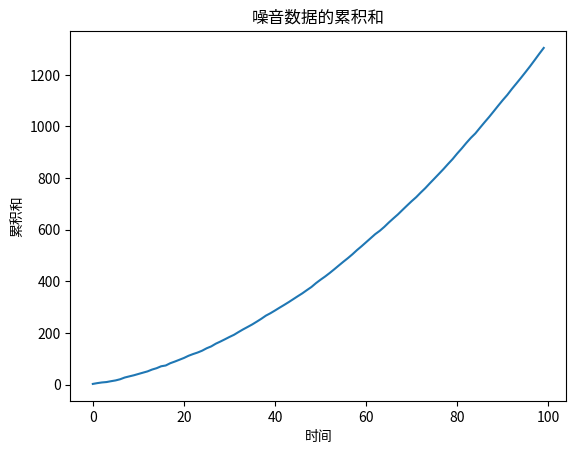

In [5]:
# 在噪音数据上调用 np.cumsum
y_cumsum = np.cumsum(y)

# 绘制累积和的时间序列
plt.plot(y_cumsum)
plt.title('噪音数据的累积和')
plt.xlabel('时间')
plt.ylabel('累积和')
plt.show()



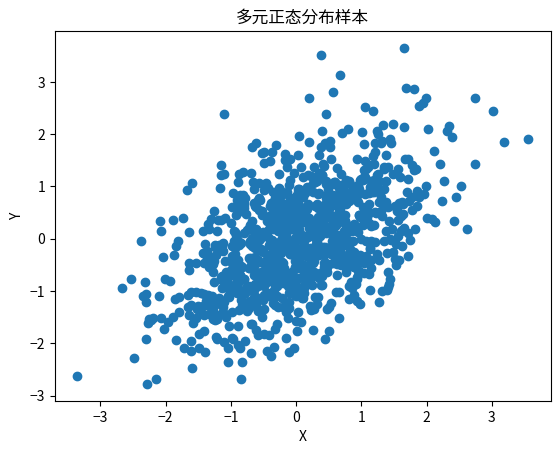

In [6]:
# 生成并绘制来自多元正态分布的1000个样本

# 定义均值向量和协方差矩阵
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# 生成1000个来自多元正态分布的样本
samples = np.random.multivariate_normal(mean, cov, 1000)

# 绘制散点图
plt.scatter(samples[:, 0], samples[:, 1])
plt.title('多元正态分布样本')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [7]:
# 计算刚刚生成的数据的样本均值和样本协方差

# 计算样本均值
sample_mean = np.mean(samples, axis=0)
print("样本均值：", sample_mean)

# 计算样本协方差
sample_cov = np.cov(samples, rowvar=False)
print("样本协方差：\n", sample_cov)


样本均值： [ 0.02749124 -0.01524096]
样本协方差：
 [[0.9669707  0.50906429]
 [0.50906429 0.99616415]]


In [8]:
# 手动计算样本均值和样本协方差

# 手动计算样本均值
sample_mean_manual = [sum(samples[:, i]) / len(samples) for i in range(samples.shape[1])]
print("手动计算的样本均值：", sample_mean_manual)

# 手动计算样本协方差
centered_data = samples - sample_mean_manual
sample_cov_manual = np.dot(centered_data.T, centered_data) / (len(samples) - 1)
print("手动计算的样本协方差：\n", sample_cov_manual)


手动计算的样本均值： [0.0274912402712741, -0.015240960061740248]
手动计算的样本协方差：
 [[0.9669707  0.50906429]
 [0.50906429 0.99616415]]
